In [56]:
from importlib import reload
import qubic.job_manager_jpm as _jm
from matplotlib import pyplot as plt
import chipcalibration.rabi_experiments as _rabi
import chipcalibration.ramsey_jpm as _ramsey
from distproc.hwconfig import FPGAConfig, load_channel_configs
import chipcalibration.config as _cfg
import qubic.rpc_client as _rc
import numpy as np
import logging
logging.basicConfig(level=0)

In [2]:
reload(_ramsey)
reload(_rabi)

<module 'chipcalibration.rabi_experiments' from '/home/jpmarceaux/chipcalibration/chipcalibration/rabi_experiments.py'>

In [3]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = _cfg.load_configs(qchipname, qchip_file='qubitcfg_jpm.json')

In [13]:
runner = _rc.CircuitRunnerClient(ip='192.168.1.247')
jm = _jm.JobManager(fpga_config, channel_config, runner, qchip)

In [14]:
readout_register = ['Q2', 'Q3']

## GMM Rabi

In [15]:
pulse_width_interval = np.linspace(0, 100e-9, 5)
gmm_drive_amp = 0.3

In [16]:
gmm_rabi = _rabi.GMMRabi(readout_register, target_amplitude, pulse_width_interval, 
                       channel_configs=channel_config)

INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:do

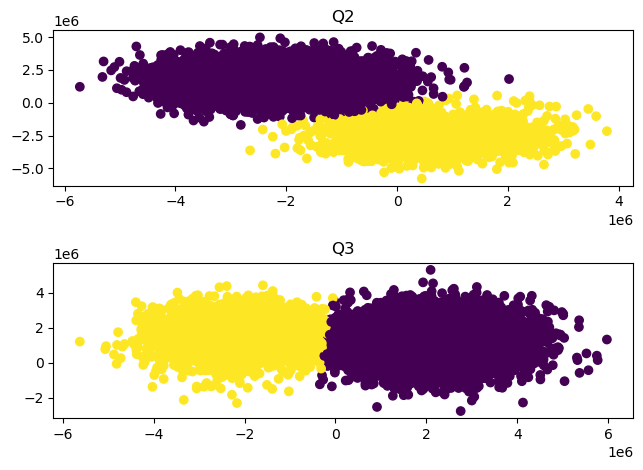

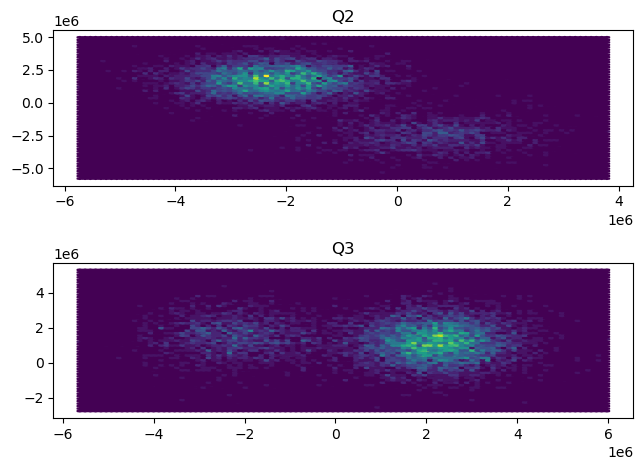

In [17]:
gmm_rabi.run_and_report(jm, 1000, qchip)

In [18]:
gmm_manager = gmm_rabi.gmm_manager

## Make a jobmanager with a GMMi

In [46]:
reload(_rabi)

<module 'chipcalibration.rabi_experiments' from '/home/jpmarceaux/chipcalibration/chipcalibration/rabi_experiments.py'>

In [47]:
# setup a job manager with the GMM Manager
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = _cfg.load_configs(qchipname)

jobmanager = _jm.JobManager(fpga_config, channel_config, runner, qchip, gmm_manager)

## Time Rabi

In [52]:
qchip.gates['Q3X90'].cfg_dict[0]['amp']

0.1496551724137931

In [53]:
readout_register = ['Q2', 'Q3']
target_register = ['Q2']
pulse_width_interval = np.linspace(0, 100e-9, 10)
target_amp = qchip.gates['Q3X90'].cfg_dict[0]['amp']

In [54]:
trabi = _rabi.TimeRabi(target_register, readout_register, target_amp, pulse_width_interval)

INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:do

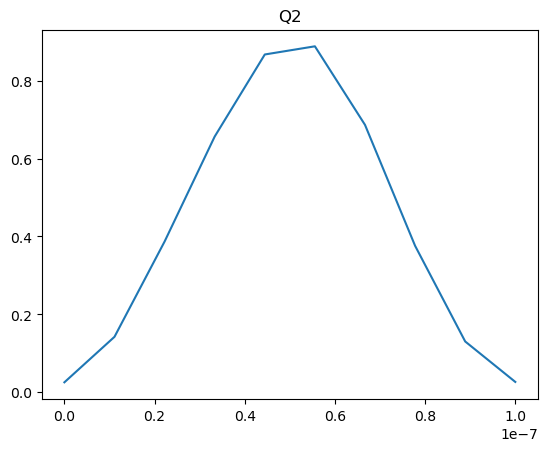

Please input the approximate period of the oscillation for fitting1e-7


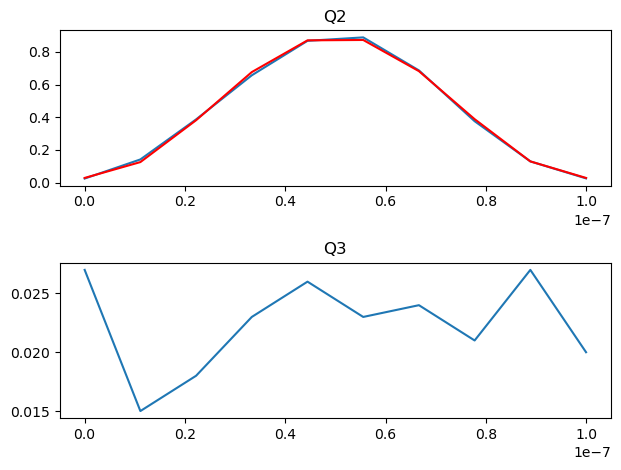

[2.4905305304095858e-08, 0.3]

In [55]:
trabi.run_and_report(jobmanager, 1000, qchip, fit_type='period')

# Amp rabi

In [22]:
amp_interval = np.linspace(0, 0.5, 20)

In [23]:
arabi = _rabi.AmpRabi(target_register, readout_register, amp_interval, 
                      24e-9)

In [24]:
arabi.circuits

[[{'name': 'delay', 't': 0.0004},
  {'name': 'barrier', 'qubit': ['Q2']},
  {'name': 'read', 'qubit': ['Q2']}],
 [{'name': 'delay', 't': 0.0004},
  {'name': 'rabi',
   'qubit': ['Q2'],
   'modi': {(0, 'twidth'): 2.4e-08},
   (0, 'amp'): 0.02631578947368421},
  {'name': 'barrier', 'qubit': ['Q2']},
  {'name': 'read', 'qubit': ['Q2']}],
 [{'name': 'delay', 't': 0.0004},
  {'name': 'rabi',
   'qubit': ['Q2'],
   'modi': {(0, 'twidth'): 2.4e-08},
   (0, 'amp'): 0.05263157894736842},
  {'name': 'barrier', 'qubit': ['Q2']},
  {'name': 'read', 'qubit': ['Q2']}],
 [{'name': 'delay', 't': 0.0004},
  {'name': 'rabi',
   'qubit': ['Q2'],
   'modi': {(0, 'twidth'): 2.4e-08},
   (0, 'amp'): 0.07894736842105263},
  {'name': 'barrier', 'qubit': ['Q2']},
  {'name': 'read', 'qubit': ['Q2']}],
 [{'name': 'delay', 't': 0.0004},
  {'name': 'rabi',
   'qubit': ['Q2'],
   'modi': {(0, 'twidth'): 2.4e-08},
   (0, 'amp'): 0.10526315789473684},
  {'name': 'barrier', 'qubit': ['Q2']},
  {'name': 'read', 'qubit'

INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:done scheduling
INFO:root:done resolving block
INFO:root:done z-resolving block
INFO:root:do

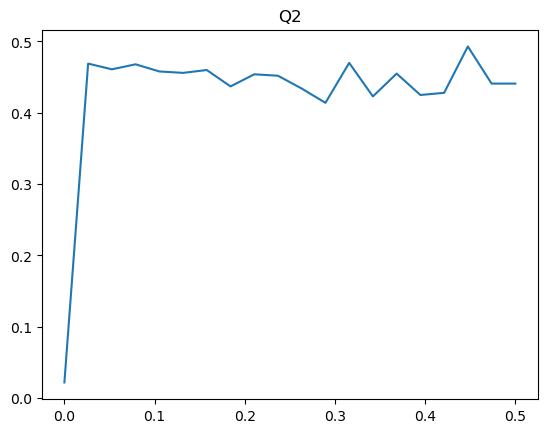

Please input the approximate period of the oscillation for fitting0


/home/jpmarceaux/chipcalibration/chipcalibration/rabi_experiments.py:254: RuntimeWarning: divide by zero encountered in divide
  return A*np.cos(2*np.pi*x/drive_period - phi) + B
/home/jpmarceaux/chipcalibration/chipcalibration/rabi_experiments.py:254: RuntimeWarning: invalid value encountered in divide
  return A*np.cos(2*np.pi*x/drive_period - phi) + B
/home/jpmarceaux/chipcalibration/chipcalibration/rabi_experiments.py:254: RuntimeWarning: invalid value encountered in cos
  return A*np.cos(2*np.pi*x/drive_period - phi) + B


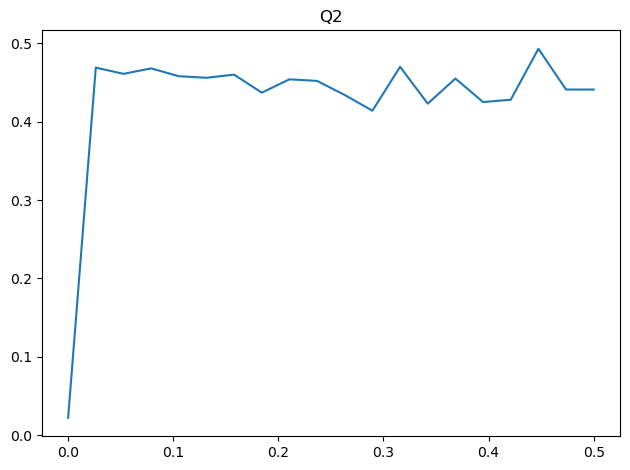

In [25]:
arabi.run_and_report(jobmanager, 1000, qchip, fit_type='period')

In [198]:
#trabi.update_qchip(qchip)

## Ramsey

In [139]:
delay_interval = np.linspace(0,50.e-6,50)
initial_drive_frequency = qchip.qubits[target_register[0]].freq
print('Initial drive frequency:', initial_drive_frequency)

Initial drive frequency: 5125000000


In [140]:
iramsey = _ramsey.RamseyExperiment(target_register, readout_register, 
                                   delay_interval, initial_drive_frequency)

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

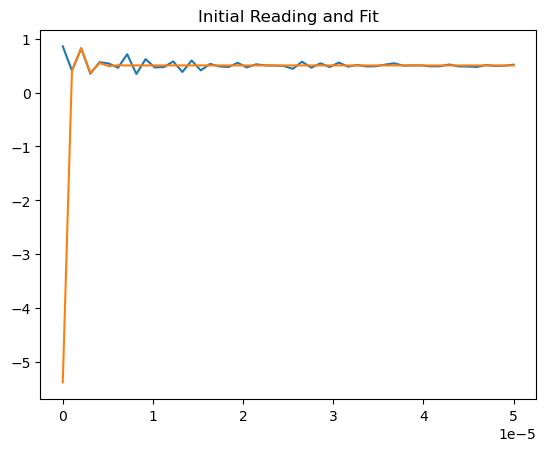

<Figure size 640x480 with 0 Axes>

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

{} could not be fit


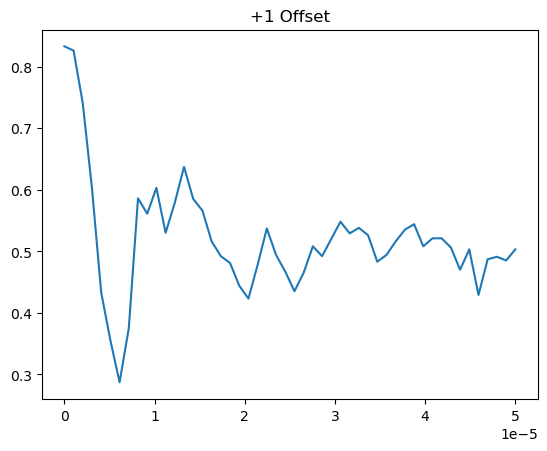

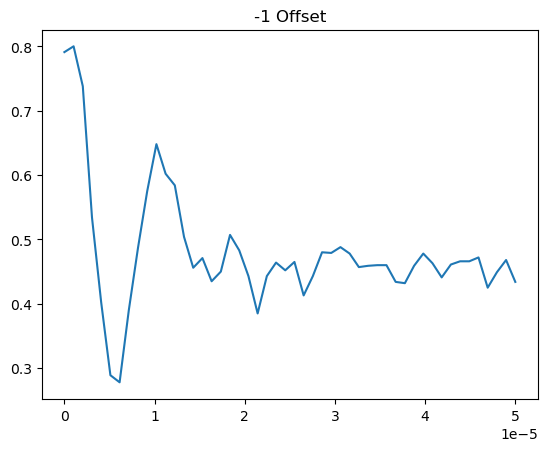

<Figure size 640x480 with 0 Axes>

Was the differential pos or neg? Please input +1 or -1
0
Please input +1 or -1
Was the differential pos or neg? Please input +1 or -1
exit


ValueError: invalid literal for int() with base 10: 'exit'

In [141]:
iramsey.run_and_report(jobmanager, 1000, qchip)